# Часть I: О теореме Байеса

## 1. Прокурор

Ошибка прокурора заключается в том, что он считает достаточным учесть вероятность, что у человека редкая группа крови (которой обладает 1% населения города). При этом он не учитывает тот факт, что 1% процент от населения города – это 0,1 * 1000000 = 10000 человек.

В качестве правильной вероятности необходимо было рассматривать оценку условной вероятности, что человек является убийцей при условии, что у него редкая группа крови.


## 2. Адвокат

Ошибка адвоката заключается предложение исключить данную информацию из материалов дела. Данное предложение является ошибкой, потому что наличие у подозреваемого редкой крови увеличивает его вероятность быть виновным, т.к. редкой кровью обладают лишь 10000 жителей города, а не миллион, т.е. число сокращается в 100 раз.


## 3. Тест на болезнь

Введём обозначения:

* d - человек болен (соответственно, $ \overline{d} $ - не болен)
* t - тест положительный (соответственно, $ \overline{t} $ - тест отрицательный)

А также рассмотрим следующие условные вероятности по теореме Байеса:

1. Вероятность, что человек болен болен при условии положительного теста:

$$ 
p(d|t)=\frac{p(t|d)p(d)}{p(t)}=\frac{p(t|d)p(d)}{p(t|d)p(d) + p(t|\overline{d})p(\overline{d})}
$$

2. Вероятность, что человек болен при условии отрицательного теста:

$$
p(d|\overline{t})=\frac{p(\overline{t}|d)p(d)}{p(\overline{t})}=\frac{p(\overline{t}|d)p(d)}{p(\overline{t}|d)p(d) + p(\overline{t}|\overline{d})p(\overline{d})}
$$

С учётом начальных условий получаем:

$$ 
p(d|t)=\frac{0.95 \cdot 0.01}{0.95 \cdot 0.01 + 0.05 \cdot 0.99} \approx 0.16
$$

$$
p(d|\overline{t})=\frac{0.05 \cdot 0.01}{0.05 \cdot 0.01 + 0.95 \cdot 0.99} \approx 0.00053
$$

Теперь рассмотрим ложноположительную $ p(t|\overline{d}) $ и ложноотрицательную $ p(\overline{t}|d) $ ошибки с учётом максимальной вероятности в $ 0.05 $ в обоих случаях. Рассмотрим по очереди уменьшение ошибок на $ 0.01 $.

1. Уменьшим $ p(t|\overline{d}) $

$$ 
p(t|\overline{d}) = 0.04 => p(\overline{t}|\overline{d}) = 1 - p(t|\overline{d}) = 0.96
$$

Тогда получим, что:
$$
p(d|t) \approx 0.19348
$$
$$
p(d|\overline{t}) \approx 0.00053
$$

Соответственно, $ p(d|t) $ увеличилось на $ 0.03348 $, тогда как $ p(d|\overline{t}) $ уменьшилось на $ 0 $ (с учётом $ 5 $-го знака).

2. Уменьшим $ p(\overline{t}|d) $

$$
p(\overline{t}|d) = 0.04 => p(t|d) = 1 - p(\overline{t}|d) = 0.96
$$

Тогда получим, что:
$$
p(d|t) \approx 0.16244
$$
$$
p(d|\overline{t}) \approx 0.00043
$$

Соответственно, $ p(d|t) $ увеличилось на $ 0.00244 $, тогда как $ p(d|\overline{t}) $ уменьшилось на $ 0.0001 $.

## Итог

Таким образом, учитывая уровень прироста $ p(d|t) $ и уровень уменьшение $ p(d|\overline{t}) $, врачам лучше сосредоточиться на уменьшении вероятности ложноположительной ошибки, т.е. $ p(t|\overline{d}) $.

# Часть II: О линейной регрессии

## 1. Подготовка данных по COVID-19

Данные взяты с [ресурса](https://ourworldindata.org/coronavirus-source-data)

In [ ]:
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
FILENAME_COVID = 'owid-covid-data.csv'
DATE_FROM = datetime.datetime(year=2020, month=3, day=3)
DATE_TO = datetime.datetime(year=2020, month=4, day=21)

df = pd.read_csv(FILENAME_COVID, index_col=None, header=0)

df = df[df['location'] == 'Russia']
df = df[['date', 'new_cases', 'total_cases']]

df['date'] = pd.to_datetime(df['date'])
df['new_cases'] = df['new_cases'].replace({0: 1})

df_50 = df[(df['date'] >= DATE_FROM) & (df['date'] <= DATE_TO)]

df.reset_index(drop=True, inplace=True)
df_50.reset_index(drop=True, inplace=True)  # 50 дней

df_50.describe()

,new_cases,total_cases
count,50.000000,50.000000
mean,1055.300000,8202.460000
std,1610.954556,13530.534343
min,1.000000,3.000000
25%,18.750000,69.750000
50%,212.000000,1150.000000
75%,1388.000000,9766.250000
max,6060.000000,52763.000000


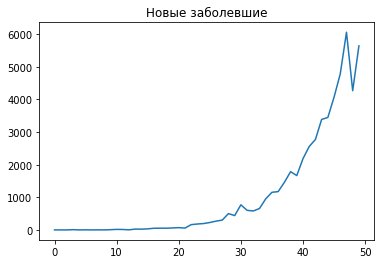

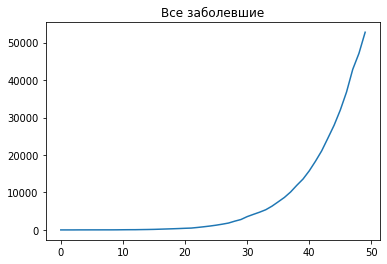

In [ ]:
plt.plot(df_50.index, df_50['new_cases'])
plt.title('Новые заболевшие')
plt.show()

plt.plot(df_50.index, df_50['total_cases'])
plt.title('Все заболевшие')
plt.show()

## 2. Построение графиков целевых переменных

In [ ]:
x = np.array([i + 1 for i in range(df_50.shape[0])]).reshape(-1, 1)
ln_y_total_cases = np.log(df_50['total_cases'])

### 2a Обучение модели с экспоненциальным ростом числа заболевших

y = e^(0.1983x + 1.6224)



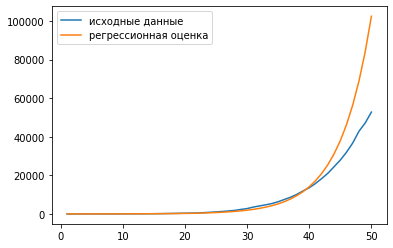

In [ ]:
model = LinearRegression()
model.fit(x, ln_y_total_cases)

print(f'y = e^({round(model.coef_[0], 4)}x + {round(model.intercept_, 4)})', end='\n' * 2)

predict_y = lambda x: np.exp(model.coef_[0] * x + model.intercept_)

plt.plot(x, df_50['total_cases'], label='исходные данные')
plt.plot(x, [predict_y(i) for i in x.ravel()], label='регрессионная оценка')
plt.legend()
plt.show()

### 2b Апостериорное распределение параметров

y = e^(0.1983x + 1.6209)


[1.62094819 0.19833536]
[[ 1.85338142e-03 -5.50509188e-05]
 [-5.50509188e-05  2.15934530e-06]]


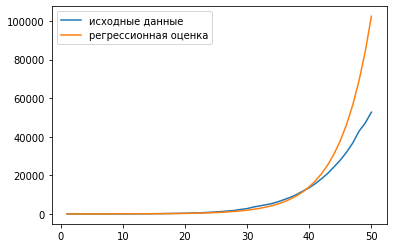

In [ ]:
def bayesian_update(mu, sigma, x, y, sigma_noise=0.15):
    """Обновление мат. ожидания и дисперсии"""

    x_matrix = np.array([[1, x]])
    sigma_n = np.linalg.inv(
        np.linalg.inv(sigma) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix))
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(
        np.transpose(x_matrix), np.array([y])))
    return mu_n, sigma_n


current_mu, current_sigma = np.array([0, 0]), 2 * np.array([[1, 0], [0, 1]])

for px, py in zip(x.ravel(), ln_y_total_cases):
    current_mu, current_sigma = bayesian_update(current_mu, current_sigma, px, py)

print(f'y = e^({round(current_mu[1], 4)}x + {round(current_mu[0], 4)})', end='\n' * 2)

print()
print(current_mu)
print(current_sigma)

func = lambda x: np.exp(current_mu[0] + current_mu[1] * x)

plt.plot(x, df_50['total_cases'], label='исходные данные')
plt.plot(x, [func(i) for i in x.ravel()], label='регрессионная оценка')
plt.legend()
plt.show()

### 2c Сэмплирование экспонент, построение графиков

In [ ]:
def plot_sample_exp(x, mu, sigma, n=200, lw=0.1, figsize=(15, 8)):
    """
    Нарисовать сэмплы экспонент со случайными параметрами
    распределёнными по нормальному закону распределению с параметрами
    mu и sigma в качестве мат. ожидания и дисперсии
    """

    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot()

    collection_weights = np.random.multivariate_normal(mu, sigma, n)

    for weights in collection_weights:
        ax.plot(x, np.exp(weights[0] + weights[1] * x), 'k-', lw=lw)
    
    plt.show()

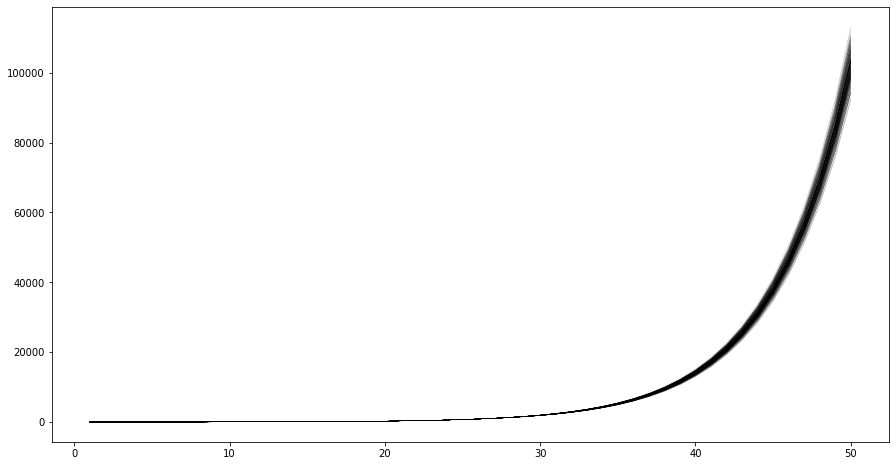

In [ ]:
plot_sample_exp(x, current_mu, current_sigma)

*Прогноз к 1 мая*

In [ ]:
N_SAMPLE = 1000
DATE_MAY = datetime.datetime(year=2020, month=5, day=1)
DATE_JUNE = datetime.datetime(year=2020, month=6, day=1)
DATE_SEPT = datetime.datetime(year=2020, month=9, day=1)

In [ ]:
def predict_in_future_using_sample(date_to, n_sample=100):
    df_may = df[(df['date'] >= DATE_FROM) & (df['date'] <= date_to)]

    x_may = np.array([i + 1 for i in range(df_may.shape[0])]).reshape(-1, 1)
    NUMBER_MAY_1 = x_may.shape[0]

    collection_weights = np.random.multivariate_normal(current_mu, current_sigma, n_sample)


    collection_predict_may = []
    for weights in collection_weights:
        plt.plot(x_may, np.exp(weights[0] + weights[1] * x_may), 'k-', lw=0.1)

        collection_predict_may.append(np.exp(weights[0] + weights[1] * NUMBER_MAY_1))

    plt.title('Сэмпл экспонент')
    plt.show()

    plt.title(f'Гистограмма заболевших на {date_to.date()}')
    plt.hist(collection_predict_may, bins=20)
    plt.show()

    print(pd.Series(collection_predict_may).describe())
    print('Общее количество заражённых:', int(np.mean(collection_predict_may)))

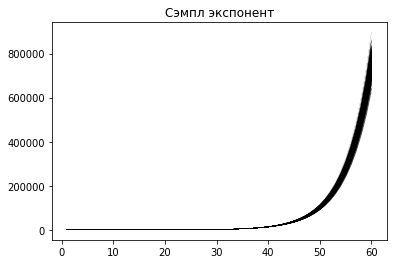

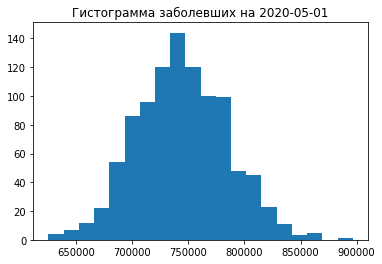

count      1000.000000
mean     744469.638093
std       40648.779050
min      625123.112789
25%      717410.165781
50%      743092.494677
75%      771916.568868
max      896633.848837
dtype: float64
Общее количество заражённых: 744469


In [ ]:
predict_in_future_using_sample(DATE_MAY, N_SAMPLE)

*Прогноз к 1 июня*

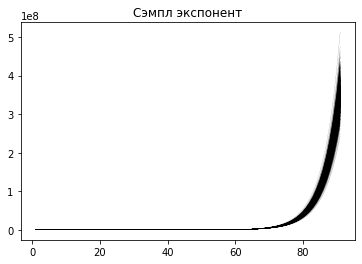

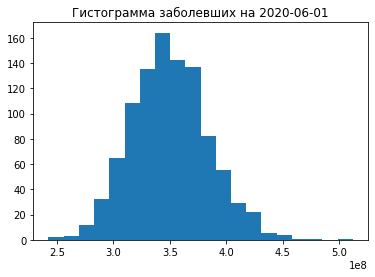

count    1.000000e+03
mean     3.502719e+08
std      3.435531e+07
min      2.422736e+08
25%      3.270264e+08
50%      3.481554e+08
75%      3.717668e+08
max      5.123564e+08
dtype: float64
Общее количество заражённых: 350271925


In [ ]:
predict_in_future_using_sample(DATE_JUNE, N_SAMPLE)

*Прогноз к 1 сентября*

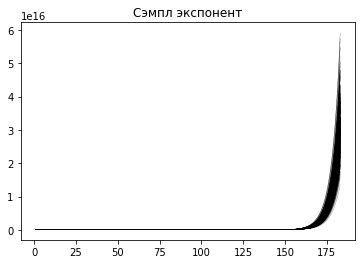

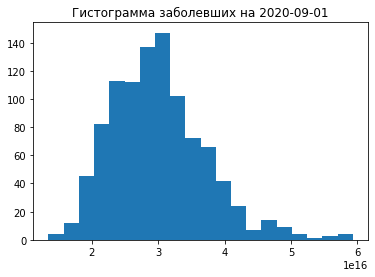

count    1.000000e+03
mean     3.003024e+16
std      7.127532e+15
min      1.345712e+16
25%      2.485749e+16
50%      2.937989e+16
75%      3.398192e+16
max      5.931411e+16
dtype: float64
Общее количество заражённых: 30030242657601056


In [ ]:
predict_in_future_using_sample(DATE_SEPT, N_SAMPLE)